# EE4371 - DSA - Assignment-4 - CH18B035 - Gunavardhan

## Q1. Show how to implement a stack using two queues. Analyze the running time of the stack operations

<b>Aim</b> : To implement stack basic functionalities using two queues.<br>
<b>Approach</b> : From basic principles of queues, lets try to implement a stack. 

Stack principle is LIFO (last in - first out), in which elements are added and removed from the same end, called top.

In contrast queue is FIFO (first in - first out) data structure, in which elements are added only from the one side - rear and removed from the other - front.

In order to implement stack using queues, we need to maintain two queues q1 and q2. Also we will keep top stack element in a constant memory.

<b>Coming to basic functions of stack : PUSH(), POP(), TOP(), EMPTY(), SIZE()</b><br>
<b>Push</b><br>
<b>Logic : </b>
When we push an element into a queue, it will be stored at back of the queue due to queue's properties. But we need to implement a stack, where last inserted element should be in the front of the queue, not at the back. To achieve this we can invert the order of queue elements when pushing a new element.
<b>Psedocode : </b><br>
PUSH(q1, q2, x):

    q1.push (x)
    while(not q1.empty()):
        q2.push(q1.pop())
    queue temp = q1
    q1 = q2
    q2 = temp
<b>Complexity : </b> The algorithm removes n elements and inserts n + 1 elements to q1 , where n is the stack size. This gives 2n + 1 operations. The operations add and remove in queues has O(1) complexity. Hence total complexity ~ O(2n) ~ O(n)

<b>Pop</b><br>
<b>Logic : </b>
The last inserted element is always stored at the front of q1 and we can pop it for constant time.<br>
<b>Complexity : </b> O(1) As we just pop from first queue and pop cost is O(1)

<b>Empty</b><br>
Queue q1 contains all stack elements, so the algorithm checks if q1 is empty.<br>
<b>Complexity : </b> O(1) As check is done using size element which is constant memory

<b>Top</b><br>
The top element is always positioned at the front of q1. Algorithm return it.<br>
<b>Complexity : </b> O(1) As top is stored as constant memory

<b>Size</b><br>
Size can be stored in constant memory and manipulated based on function called.<br>
<b>Complexity : </b> O(1) As size is stored as constant memory

<b>Code Implementation :</b>

In [9]:
from queue import Queue

class Stack: 
    def __init__(self):  # Initializing two queues
        self.q1 = Queue() 
        self.q2 = Queue()  
        
        self.curr_top = -1
        self.curr_size = 0
  
    def push(self, x): #Complexity O(n) where n is stack size
        self.curr_size += 1
        self.curr_top = x
        self.q2.put(x)  
  
        while (not self.q1.empty()):    #check if q1 is empty if not shift to q2
            self.q2.put(self.q1.get())
                                        #In the end q2 elements are in the order same as stack
        self.q = self.q1  
        self.q1 = self.q2  
        self.q2 = self.q 
  
    def pop(self):                      #For pop checking all necessary conditions before acknowledging the values
        if (self.q1.empty()):  
            return
        self.q1.get()
        if (self.q1.empty()): 
            self.curr_top = -1
        else:
            self.curr_top = self.q1.queue[0]
        self.curr_size -= 1
        
    def empty(self):                    # Rest functions are based on values stored in above functions hence O(1)
        return self.curr_size == 0
        
    def top(self):
        return self.curr_top
  
    def size(self): 
        return self.curr_size

In [ ]:
#Example 
s = Stack() 
s.push(9)                        # stack {9}
s.push(6)                        # stack {9, 6}
s.push(3)                        # stack {9, 6, 3}

print("Current size: ", s.size()) 
print("Top Element: ", s.top())  
s.pop()                         # stack {9, 6}
print("Top Element: ", s.top())  
print("Is empty: ", s.empty())
s.pop()                         # stack {9}
print("Top Element: ", s.top())    
s.pop()                         # stack {}
print("Top Element: ", s.top())  
print("Current size: ", s.size()) 
print("Is empty: ", s.empty())

#Output
# Current size:  3
# Top Element:  3
# Top Element:  6
# Is empty:  False
# Top Element:  9
# Top Element:  -1
# Current size:  0
# Is empty:  True

## Q2. Demonstrate what happens when we insert the keys 5, 28, 19, 15, 20, 33, 12, 17, 10 into a hash table with collisions resolved by chaining. Let the table have 9 slots, and let the hash function be h(k) = k mod 9.

<b>Aim</b> : To demonstrate hashing in the times of collisons by chaining<br>
<b>Approach</b> : From the idea of hashing, and definition of chaining, lets try to insert elements one by one

Hashing : <br>
<b>Principle : </b>Hashing is based on the principle of direct addressing.

It is a technique to convert a range of key values into a range of indexes of an array and is designed to use a special function called the Hash function which is used to map a given value with a particular key for faster access of elements. The efficiency of mapping depends of the efficiency of the hash function used. 

Example, let h - hash function map the universe U of keys into the slots of a has table T[0,1, m-1] where m is the size of hash table which is much less than size of U.

With this basic idea of reduced size, base operations such as search delete etc can take place much faster as its done on much smaller size array m.

But one problem is two keys can have same hash value this situation is called collision.

This can be taken care in two ways: one is chaining and other is open addressing or linear probing.

<b> Chaining </b><br>
<b> Idea :</b> The idea is to make each cell of hash table point to a linked list of records that have same hash function value and append the incoming elements at the end of linked list.

Hence when base data structure operations are called like search or delete, we go to that respective hash value linked list and do full scan, which is why having a best hash function which minimizes the collisions as much as possible is desirable else its no different than a linked list O(n) complexity

<b> Demonstration of given example </b>:<br>
<b> keys </b>: 5, 28, 19, 15, 20, 33, 12, 17, 10<br>
<b> hash Funciton </b>: h(k) = k mod 9 

| key | hash value |
|--------|:---------:|
| 5  | 5  mod 9 = 5  |
| 28 | 28 mod 9 = 1  |
| 19 | 19 mod 9 = 1  |
| 15 | 15 mod 9 = 6  |
| 20 | 20 mod 9 = 2  |
| 33 | 33 mod 9 = 5  |
| 12 | 12 mod 9 = 3  |
| 17 | 17 mod 9 = 9  |
| 10 | 10 mod 9 = 1  |

Lets create empty hash table as below and keep on inserting elements one by one :


| hash value | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
|------------|---|---|---|---|---|---|---|---|---|---|
    |  keys  |   |   |   |   |   |   |   |   |   |   |


Insert 5, 28 with hash value 5, 1 resp :

| hash value | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
|------------|---|---|---|---|---|---|---|---|---|---|
    |  keys  |   | 28|   |   |   | 5 |   |   |   |   |

Insert 19 with hash value 1 means first collision hence appended at the end of linked list of hash value 1:

| hash value | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
|------------|---|---|---|---|---|---|---|---|---|---|
    |  keys  |   | 28|   |   |   | 5 |   |   |   |   |
|            |   | 19|   |   |   |   |   |   |   |   |

Insert 15, 20 with hash value 6, 2 resp :

| hash value | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
|------------|---|---|---|---|---|---|---|---|---|---|
    |  keys  |   | 28| 20|   |   | 5 | 15|   |   |   |
|            |   | 19|   |   |   |   |   |   |   |   |

Insert 33 with hash value 5 means first collision hence appended at the end of linked list of hash value 5:

| hash value | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
|------------|---|---|---|---|---|---|---|---|---|---|
    |  keys  |   | 28| 20|   |   | 5 | 15|   |   |   |
|            |   | 19|   |   |   | 33|   |   |   |   |

Insert 12, 17 with hash value 3, 9 resp :

| hash value | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
|------------|---|---|---|---|---|---|---|---|---|---|
    |  keys  |   | 28| 20| 12|   | 5 | 15|   |   | 17|
|            |   | 19|   |   |   | 33|   |   |   |   |

Insert 10 with hash value 1 means second collision hence appended at the end of linked list of hash value 1:

Hence final hash table looks like this with multiple elements of single hash value joined by linked list:


| hash value | keys |
|--------|:---------:|
| 0 |  |
| 1 | 28 -> 19 -> 10 |
| 2 | 20 |
| 3 | 12 |
| 4 |  |
| 5 | 5 -> 33 |
| 6 | 15 |
| 7 |  |
| 8 |  |
| 9 | 17 |

## Q3. Consider a binary search tree T whose keys are distinct. Show that if the right subtree of a node x in T is empty and x has a successor y, then y is the lowest ancestor of x whose left child is also an ancestor of x

<b>Aim :</b> To show that if the right subtree of node x in T is empty and x has a successor u, then y is the lowest ancester of x whose left child is also an ancester of x.
<b>Approach :</b> Using the basic properties of binary search tree on case by case basis.

<b>Properties of given binary search tree:</b>
- All keys are distinct(given)
- Every LEFT descendant of a node has key less than that node
- Every RIGHT descendant of a node has key larger than that node

<b>Given:</b> Right subtree of node x in T is empty and x has a successor y

<b>Need to prove?</b><br>
-If y is successor of x, then y is ancestor of x<br>
-then node - x is left descendant of node - y<br>
-node y is the lowest ancestor of x whose left child is also ancestor of x

<b>Proof part : 1</b><br>
Lets assume two scenarios y is ancestor of x and y is not ancestor of x.<br>
Scenario one proves our claim so no problem.<br>
Scenario two if y is not ancestor of x, then let z be common ancestor of x & y, we know x < y as y is x successor implies x < z and z < y <br> implies x < z < y which is not possible as it means z can be successor of x which voilates our assumptions hence not possible

Hence, node y is ancestor of node x

<b>Proof part : 2</b><br>
Node x can be left or right descendant of node y, but if its right descendant then y < x from property of BST implies not possible, hence x has to be left descendant of node y

<b>Proof part : 3</b><br>
Two Scenarios, scenario one y is the lowest ancestor of x whose left child is also ancestor of x, this completes the proof as it supports our claim.<br>
scenario two if y is not lowest ancestor of x whose left child is also ancestor of x, then let z be that lowest ancestor (x < z), as we have proved in part 2 that x is in left subchild of y, implies z is also in left child of y<br>
which implies x < z < y which is not possible as it means z can be successor of x which voilates our assumptions that successor is y hence not possible.

Hence scenario one is only possible, which completes our proof.

In terms of pseudo code, we use this logic to find successor of y:<br>
Twos cases<br>
if right subtree of x is not empty then answer is minimum if right sub tree<br>
else the answer is the node which is left subchild of the parent.

<b>Pseudocode</b>

TREE SUCCESSOR(x)

    if right[x] != NIL
        then return TREE-MINIMUM(right[x])
    y <- p[x]
    while y != NIL and x = right[y]
       do x <- y
          y <- p[y]
    return y

## Q4. Describe a non-recursive algorithm for enumerating all permutations of the numbers {1, 2, …,n} using an explicit stack.

<b>Aim :</b> To construct a non-recursive algorithm for enumerating all permutations of the numbers 1-n using stack.<br>
<b>Approach :</b> From the recursive ideas of getting permutations, understand the stack and trying to implement non-recursive version.

Basic recursive Idea:<br>
In recursion, we generally take the empty array and insert each element from original array once into it and call the function again on the remaining elements, and repeat this procedure untill there are no elements left to push in original array.

This covers all the cases and gives us all permutations.

<b>Pseudo code</b><br>
PERMUT_RECUR(arr, visited, length):

    if len(arr) == length:
        print(arr)
        return
    
    for i in range(length):
        if visited[i] == False:
            visited[i] = True
            arr.append(i+1)
            PERMUT_RECUR(arr, visited, length):
            visited[i] = False
            arr.pop()

<b>Non-recursive algorithms :</b><br>
<b>Idea - 1</b> <br>
Generating the stack containing the permutations of {1, 2, .. n} using the stack containing the permutations of {1, 2, .. n-1}.

Here idea is simple using the n-1th stack to generate the nth stack, it is obtained by inserting number n at all possible locations of each sequence of n-1th stack.

Example stack containing 1-2 permutations is {[1, 2],[2, 1]}, now to generate 1-3 permutations stack take each sequence and insert 3 at all possibile locations and insert back take [1, 2] and insert 3 gives [3, 1, 2],[1, 3, 2],[1, 2, 3]

<b> Psuedo code </b>
PERMUT_IDEA1(n):

    stack1 = [[1]]
    stack2 = []
    for i in range(2, n+1):
        while stack1:
            list = stack1.pop()
            for j in range(len(list)):
                list.insert(j, i)
                stack2.append(list)
                list.pop(j)
        stack1 = stack2
        stack2 = []
        
But this idea is too costly as it computes all permutations of numbers from 1-2, 1-3, ... 1-n, implying the time complexity in the range of O(1!+2!+3!+4!+...n!), can be checked by number of times for loop runs for each i.

Also this has nothing to do with recursive idea, hence now comes the optimized idea using that.

<b>Idea - 2</b><br>
Using the idea from recursion if we can use the visited array as one more array in stack with the idea of tuple.<br>
Then we can try similar stack call happening in recursive solution. 

Basically we insert the partial solution formed at each step with remaining elements left to send into the stack then one by we pop and make all possible combinations and push back into the stack.

Example lets take sequence "1, 2, 3" then initial stack would be <"", "1, 2, 3"><br>
step 1 - <"1", "2, 3"> , <"2", "1, 3">, <"3", "1, 2"><br>
step 2 - <"1, 2", "3"> , <"1, 3", "2"> , <"2, 1", "3"> , <"2, 3", "1"> , <"3, 1", "2"> , <"3, 2", "1"><br>
step 3 - <"1, 2, 3", ""> , <"1, 3, 2", ""> , <"2, 1, 3", ""> , <"2, 3, 1", ""> , <"3, 1, 2", ""> , <"3, 2, 1", ""><br>
In this manner we generate all 6 combinations

Another example with tree diagram, as we use <b>stack this happens in a depth-first search way</b>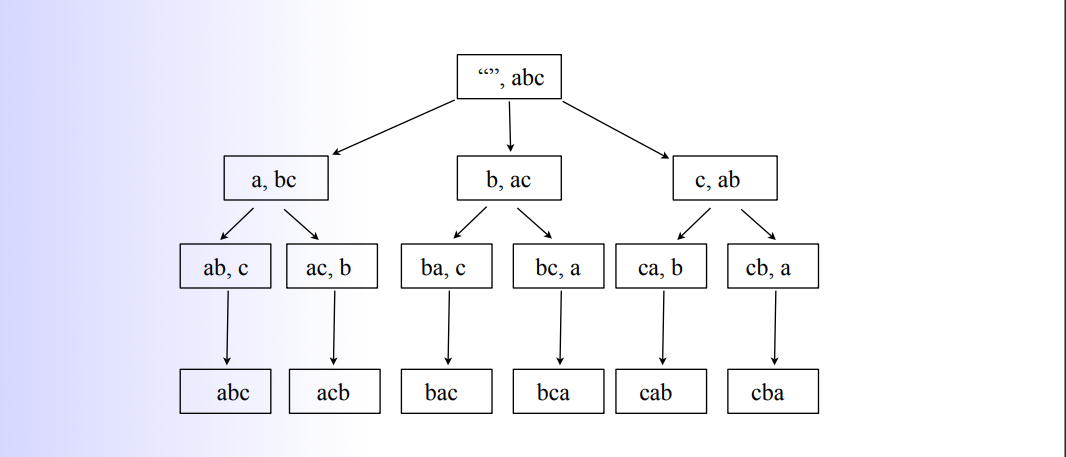

<b> Psuedo code </b>
PERMUT_IDEA2(n):
    
    arr = range(1, n+1
    stack = [([], arr)]
    while stack:
        (arr1, arr2) = stack1.pop()
        if arr2 == []:
            print(arr2)
            continue
            
        for i in range(len(arr2)):
            temp = arr2
            arr1.append(arr2[i])
            temp.pop(i)
            stack.append(arr1, temp)
            arr1.pop()

This here just computes the combinations of 1-n hence time complexity is reduced drastically to O(n!), to check we can just count the number of times the for loop inside is running

<b>Implementation :</b>

In [ ]:
def permutations(n):
    arr = list(range(1, n+1))
    stack = [([], arr)]
    count = 0
    while stack:
        (arr1, arr2) = stack.pop()
        if len(arr2) == 0:
            count += 1
            print("Permuted sequence "+ str(count) + " is ", arr1)
            continue
        
        for i in range(len(arr2)):
            temp1, temp2 = arr1[:], arr2[:]
            temp1.append(arr2[i])
            temp2.pop(i)
            stack.append((temp1, temp2))

# Example run for 3
permutations(3)
# Output:
# Permuted sequence 1 is  [3, 2, 1]
# Permuted sequence 2 is  [3, 1, 2]
# Permuted sequence 3 is  [2, 3, 1]
# Permuted sequence 4 is  [2, 1, 3]
# Permuted sequence 5 is  [1, 3, 2]
# Permuted sequence 6 is  [1, 2, 3]

## Q5. Show that any n-node binary tree can be converted to any other n-node binary tree using O(n)rotations.

<b>Aim :</b>To show that any n-node binary tree can be converted to any other n-node binary tree using O(n) rotations<br>
<b>Approach :</b> If we can figure out upper bound of any sequence to convert into a standard sequence then we can use this logic to prove our case.

For a binary search tree every node can rotate around its parent except for the root node hence there are (n-1) possible rotations.

Now lets try to find the cost for rotating a child node left or right. In the sense shown below.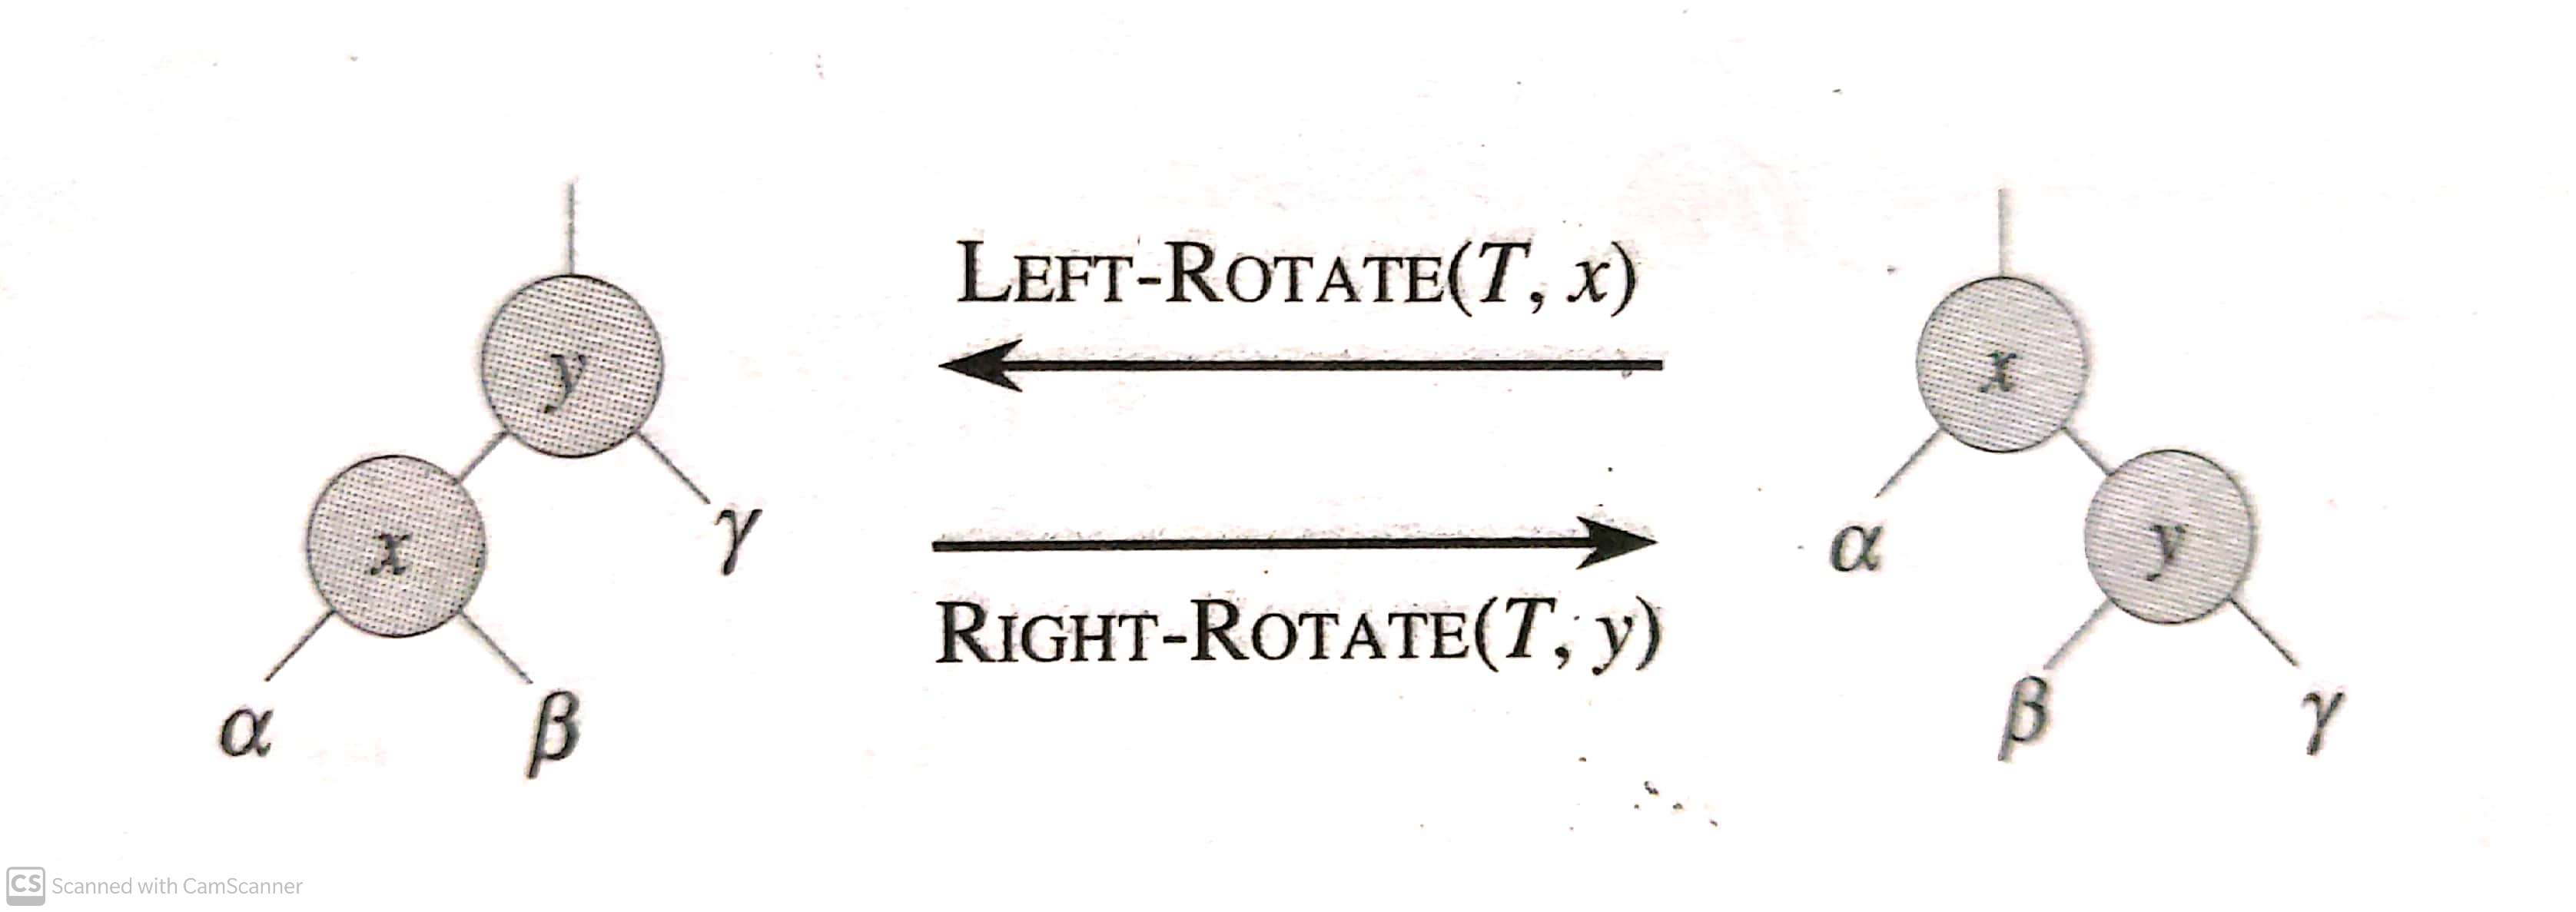

For now lets focus on right rotation<br>
When we do a right rotation on a node x, we assume that its left-child is not empty, x can be any node in the tree whose left child is not empty. the right rotation "pivots" around the link from x to y. It makes x the new root of the subtree, with y as x's right child and x's right child as y's left child.

<b> Pseudo code </b><br>
RIGHT-ROTATE(T, y)

    x = y.left
    y.left = x.right
    if x.right != T.nil
        x.right.p = y
    x.p = y.p
    if y.p == T.nil
        T.root = x
    else if y == y.p.right
        y.p.right = x
    else y.p.left = x
    x.right = y
    y.p = x
    
Similarly left rotate code
    
As the idea doesnt involve any kinda loop and takes place through if or else statments, Hence complexity is order of O(1).

<b>Now</b> coming to the original question, using this single node rotation complexity, lets try to form the solution.

As described in the approach, lets take the standard structure as complete right going tree, if we can prove that any tree can be converted to right going tree in linear time then its sufficient to prove our claim,<br>
as both our intial tree and final tree can be brought to right tree in O(n) time then, <br>
step 1 Bring initial tree to right going tree(O(n))
step 2 Formulate final tree steps to make it to right going tree 
step 3 using these steps retrace back the path from the convert intial tree to right going tree and then final tree O(n)

Hence total complexity is of order O(2*n) ~ O(n)

Lets prove transforming an arbitrary n-node binary tree into a right-going chain takes linear time:

Let the root and all successive right children of the root be the elements of the initial chain. For any node x which is a left child of a node on the chain, a single right rotation on the parent of x will add that node to the chain and not remove any elements from the chain. In this way we can shift all such x and we encounter them at most once, meaning other than root we have n-1 elements which we can encounter during this process.

Worst case is obviously left going chain which obviously needs n-1 rotations and all other cases require less or equal to that.

Thus, we can convert any binary search tree to a right chain with at most n − 1 right rotations.

Now as described in the steps let the sequence of moves to convert a intial array to right going tree be i<sub>1</sub>, i<sub>2</sub> ... i<sub>k</sub> and sequence of steps to convert final array to right going tree be j<sub>1</sub>, j<sub>2</sub> ... j<sub>m</sub> where m < n and k < n as shown above

To obtain the conversion from intial tree to final tree we should follow this sequence of steps i<sub>1</sub>, i<sub>2</sub> ... i<sub>k</sub>, j<sub>m</sub>, j<sub>m-1</sub> ... j<sub>1</sub> and each step takes time O(1).

Hence whole process is bounded by O(2*n) ~ O(n)

Hence any n-node binary tree can be converted to any other n-node binary tree in linear time.
